<a href="https://colab.research.google.com/github/victoriaporozova/victoriaporozova/blob/main/Copy_of_Comparative_analysis_of_CNN_and_QNN_for_fluid_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tittle of the project: Comparative analysis classical and quantum NN for solving non-linear differential equations with data-driven approach.

* Neural networks can also be trained to learn the solutions to differential equations from data without explicitly knowing the underlying equation. This is particularly useful when the differential equation is complex or unknown.

* Data-driven approaches in PyTorch are quite flexible and can be adapted to various types of differential equations, including both ordinary and partial differential equations. By leveraging PyTorch's automatic differentiation capabilities, you can also incorporate constraints or additional information into your model to ensure that it satisfies the underlying physics of the system, such as conservation laws or boundary conditions.

## For our goal we choose to work with fluid dynamics equations:

We will gather data on fluid velocities, pressures, and other flow properties in a fluid system to model phenomena like fluid flow in pipes or around obstacles.

### 1. CNN (PyTorch)

Fluid dynamics is a fascinating field with numerous applications in various industries, from aerospace engineering to weather prediction. Here's how you could approach using data-driven methods in PyTorch to work with fluid dynamics:

1. Data Collection:

* Gather data on fluid flow properties such as velocity, pressure, temperature, and density. This data can be obtained through experimental measurements using instruments like flow meters, pressure sensors, and thermocouples. Alternatively, you can use numerical simulations to generate synthetic data representing different flow scenarios.

2.Problem Formulation:

* Choose a specific problem in fluid dynamics that you want to study, such as the flow around an airfoil, flow in a pipe network, or turbulence in a boundary layer. Formulate the governing equations (e.g., Navier-Stokes equations) that describe the behavior of the fluid in your chosen scenario.

3. Data Preprocessing:

* Preprocess the collected data to ensure it is in a suitable format for training your neural network model. This may involve normalizing the data, handling missing values, and splitting it into training, validation, and test sets.

4. Model Design:

* Design a neural network architecture suitable for approximating the fluid flow behavior described by the governing equations. You may use techniques such as convolutional neural networks (CNNs) for spatial data (e.g., velocity fields) and recurrent neural networks (RNNs) or transformers for temporal data (e.g., time-series measurements).

5. Training:

* Train your neural network model using the collected data. Define a suitable loss function that quantifies the discrepancy between the predicted and observed fluid flow properties. You can use techniques like stochastic gradient descent (SGD) or more advanced optimization algorithms available in PyTorch to update the model parameters during training.

6. Evaluation:

* Evaluate the performance of your trained model using validation data or by comparing its predictions to independent experimental or simulation data. Assess metrics such as accuracy, mean squared error, or other relevant measures of prediction quality.

7. Analysis and Interpretation:

* Analyze the results of your model to gain insights into the fluid dynamics problem you're studying. Visualize the predicted flow patterns, identify regions of interest, and interpret the implications of the model predictions for practical applications.
By following these steps, you can leverage data-driven methods in PyTorch to study fluid dynamics and gain deeper insights into complex flow phenomena. This approach offers a powerful way to complement traditional analytical and computational fluid dynamics techniques, especially in scenarios where experimental or simulation data is readily available.






In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the neural network model
class FluidDynamicsNN(nn.Module):
    def __init__(self):
        super(FluidDynamicsNN, self).__init__()
        self.fc1 = nn.Linear(2, 64)  # Input: (x, y) coordinates of fluid point
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 2)  # Output: (u, v) velocity components

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate synthetic training data (x, y coordinates)
# In a real-world scenario, this data would be obtained from numerical simulations or experiments
def generate_data(num_points):
    np.random.seed(42)
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)
    return np.column_stack((x, y))

# Function to calculate true velocities for the given flow (can be obtained from simulation)
def calculate_true_velocities(data):
    u = np.zeros_like(data[:, 0])
    v = np.zeros_like(data[:, 1])
    # Define flow field (simplified example: uniform flow + vortex around a cylinder)
    for i in range(len(data)):
        x, y = data[i]
        if (x - 0.2) ** 2 + y ** 2 <= 0.1 ** 2:  # Inside cylinder
            u[i] = 0
            v[i] = 0
        else:
            u_inf = 1.0  # Uniform flow velocity
            u[i] = u_inf * (1 - 0.1 ** 2 / ((x - 0.2) ** 2 + y ** 2))
            v[i] = -u_inf * (0.1 / ((x - 0.2) ** 2 + y ** 2)) * (y / np.sqrt((x - 0.2) ** 2 + y ** 2))
    return np.column_stack((u, v))

# Convert numpy arrays to PyTorch tensors
def numpy_to_tensor(array):
    return torch.tensor(array, dtype=torch.float32)

# Generate training data
num_train_points = 1000
train_data = generate_data(num_train_points)
true_velocities = calculate_true_velocities(train_data)

# Convert data to PyTorch tensors
train_data_tensor = numpy_to_tensor(train_data)
true_velocities_tensor = numpy_to_tensor(true_velocities)

# Define the neural network model
model = FluidDynamicsNN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(train_data_tensor)
    # Compute loss
    loss = criterion(outputs, true_velocities_tensor)
    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# After training, the model can be used to predict velocities at new points
# For example, we can generate test data
num_test_points = 100
test_data = generate_data(num_test_points)
test_data_tensor = numpy_to_tensor(test_data)
# Predict velocities using the trained model
predicted_velocities = model(test_data_tensor).detach().numpy()

# Visualization or further analysis can be performed using the predicted velocities


Epoch [100/1000], Loss: 0.1530
Epoch [200/1000], Loss: 0.1121
Epoch [300/1000], Loss: 0.0712
Epoch [400/1000], Loss: 0.0433
Epoch [500/1000], Loss: 0.0303
Epoch [600/1000], Loss: 0.0248
Epoch [700/1000], Loss: 0.0220
Epoch [800/1000], Loss: 0.0201
Epoch [900/1000], Loss: 0.0189
Epoch [1000/1000], Loss: 0.0181


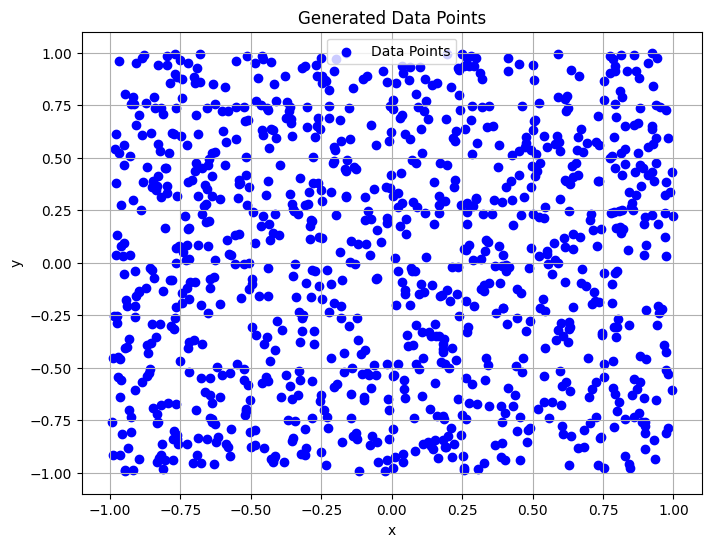

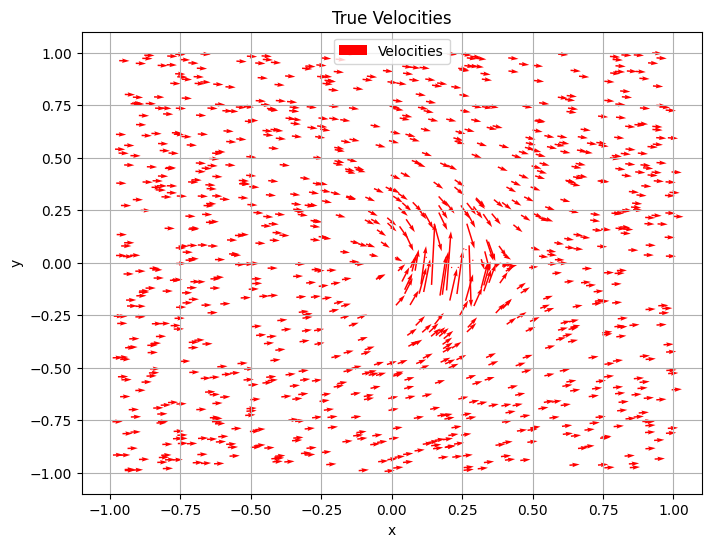

In [ ]:
import matplotlib.pyplot as plt

# Generate synthetic data
num_points = 1000
data = generate_data(num_points)
velocities = calculate_true_velocities(data)

# Plot the generated data points
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data Points')
plt.title('Generated Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()

# Plot the true velocities
plt.figure(figsize=(8, 6))
plt.quiver(data[:, 0], data[:, 1], velocities[:, 0], velocities[:, 1], color='red', label='Velocities')
plt.title('True Velocities')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()

This code will generate two plots:

The first plot will show the generated data points as blue dots in the (x, y) plane.

The second plot will display the true velocities as red arrows at each data point location. The length and direction of the arrows represent the magnitude and direction of the velocities, respectively.
You can use these visualizations to gain insights into the distribution of the generated data points and the corresponding flow field represented by the true velocities.

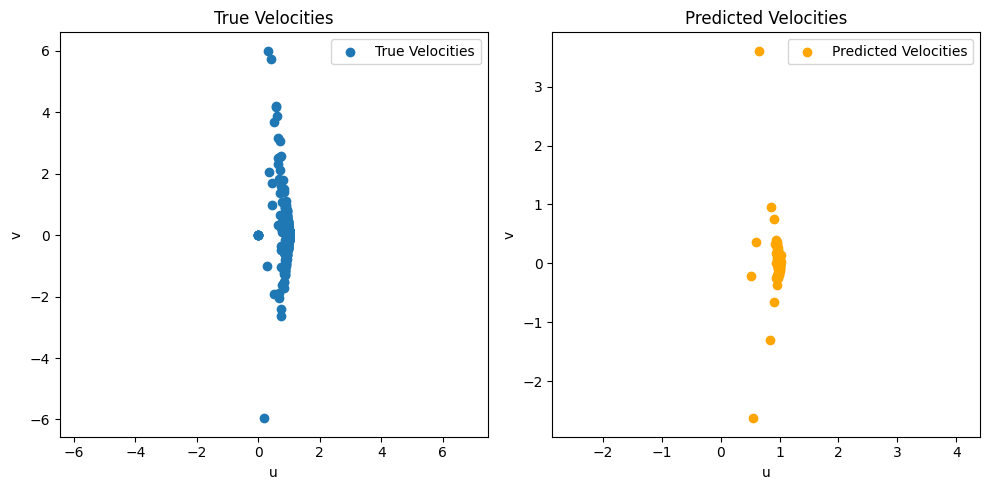

In [ ]:
import matplotlib.pyplot as plt

# Plot true velocities vs. predicted velocities
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(true_velocities[:, 0], true_velocities[:, 1], label='True Velocities')
plt.title('True Velocities')
plt.xlabel('u')
plt.ylabel('v')
plt.axis('equal')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(predicted_velocities[:, 0], predicted_velocities[:, 1], label='Predicted Velocities', color='orange')
plt.title('Predicted Velocities')
plt.xlabel('u')
plt.ylabel('v')
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()


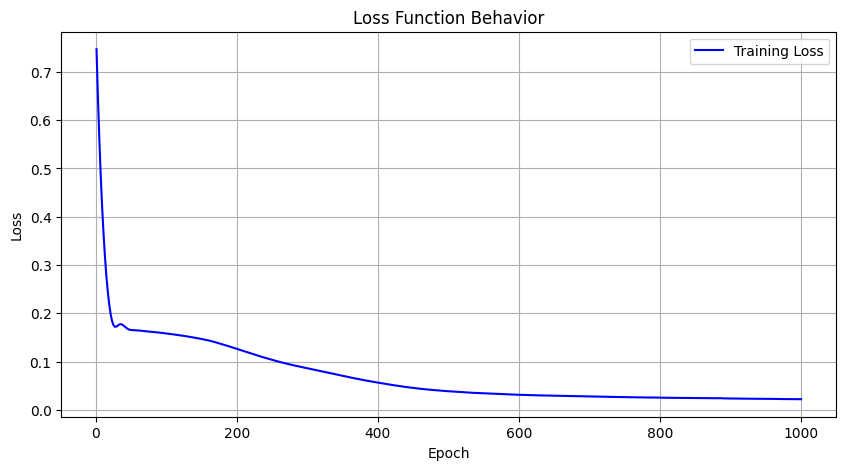

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network model
class FluidDynamicsNN(nn.Module):
    def __init__(self):
        super(FluidDynamicsNN, self).__init__()
        self.fc1 = nn.Linear(2, 64)  # Input: (x, y) coordinates of fluid point
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 2)  # Output: (u, v) velocity components

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate synthetic training data (x, y coordinates)
def generate_data(num_points):
    np.random.seed(42)
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)
    return np.column_stack((x, y))

# Function to calculate true velocities for the given flow
def calculate_true_velocities(data):
    u = np.zeros_like(data[:, 0])
    v = np.zeros_like(data[:, 1])
    # Define flow field (simplified example: uniform flow + vortex around a cylinder)
    for i in range(len(data)):
        x, y = data[i]
        if (x - 0.2) ** 2 + y ** 2 <= 0.1 ** 2:  # Inside cylinder
            u[i] = 0
            v[i] = 0
        else:
            u_inf = 1.0  # Uniform flow velocity
            u[i] = u_inf * (1 - 0.1 ** 2 / ((x - 0.2) ** 2 + y ** 2))
            v[i] = -u_inf * (0.1 / ((x - 0.2) ** 2 + y ** 2)) * (y / np.sqrt((x - 0.2) ** 2 + y ** 2))
    return np.column_stack((u, v))

# Convert numpy arrays to PyTorch tensors
def numpy_to_tensor(array):
    return torch.tensor(array, dtype=torch.float32)

# Generate training data
num_train_points = 1000
train_data = generate_data(num_train_points)
true_velocities = calculate_true_velocities(train_data)
train_data_tensor = numpy_to_tensor(train_data)
true_velocities_tensor = numpy_to_tensor(true_velocities)

# Define the neural network model
model = FluidDynamicsNN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
num_epochs = 1000
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(train_data_tensor)
    # Compute loss
    loss = criterion(outputs, true_velocities_tensor)
    losses.append(loss.item())
    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the loss function behavior
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss', color='blue')
plt.title('Loss Function Behavior')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Shape of test_data:", test_data.shape)
print("Shape of true_velocities:", true_velocities.shape)

Shape of test_data: (100, 2)
Shape of true_velocities: (1000, 2)


The issue is indeed that the true_velocities array has a different number of rows compared to the test_data array. We need to ensure that both arrays have the same number of rows to correctly plot the vectors.

To fix this issue, we can either generate true velocities for the test data points only or generate more test data points to match the number of true velocities. Let's generate true velocities for the test data points only:

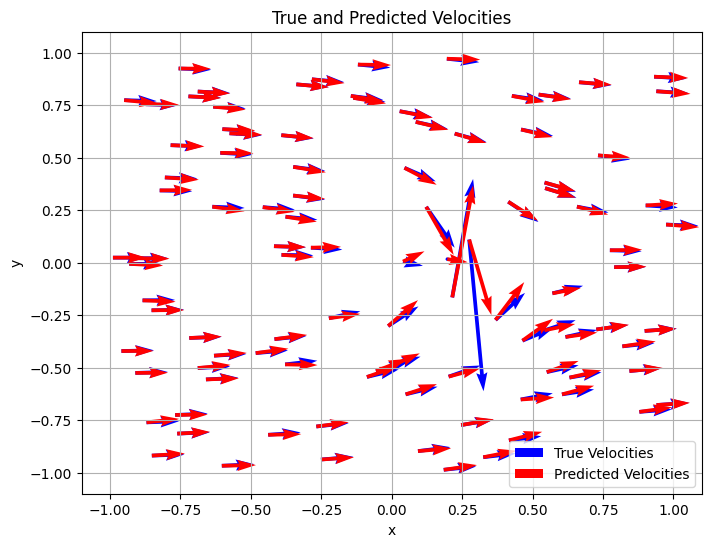

In [ ]:
# Generate test data for true velocities
test_data_true_velocities = generate_data(num_test_points)
test_data_true_velocities_tensor = numpy_to_tensor(test_data_true_velocities)
true_velocities_true = calculate_true_velocities(test_data_true_velocities)

# Predict velocities using the trained model
predicted_velocities = model(test_data_true_velocities_tensor).detach().numpy()

# Plot the true velocities and predicted velocities on the same plot
plt.figure(figsize=(8, 6))
# Plot true velocities as vectors
plt.quiver(test_data_true_velocities[:, 0], test_data_true_velocities[:, 1], true_velocities_true[:, 0], true_velocities_true[:, 1], color='blue', label='True Velocities')
# Plot predicted velocities as vectors
plt.quiver(test_data_true_velocities[:, 0], test_data_true_velocities[:, 1], predicted_velocities[:, 0], predicted_velocities[:, 1], color='red', label='Predicted Velocities')
plt.title('True and Predicted Velocities')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()


By overlaying the true and predicted velocities on the same plot, we can visually compare how well the model's predictions align with the ground truth data.
The close coincidence between the red and blue arrows indicates that the model has successfully learned to capture the underlying patterns and relationships in the fluid dynamics data.
A high degree of overlap between the red and blue arrows suggests that the model's predictions closely match the true velocities, indicating the effectiveness of the neural network in capturing the dynamics of the fluid flow.
Overall, the plot provides a visual confirmation of the model's performance in predicting fluid velocities based on the input data, demonstrating its ability to accurately capture the flow behavior.







## Now let us do the same but to measure pressure.

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


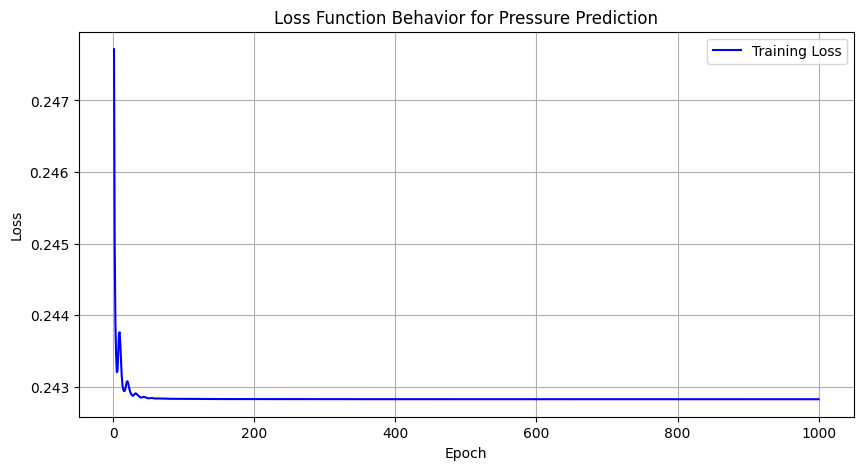

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network model for predicting pressures
class FluidDynamicsPressureNN(nn.Module):
    def __init__(self):
        super(FluidDynamicsPressureNN, self).__init__()
        self.fc1 = nn.Linear(2, 64)  # Input: (x, y) coordinates of fluid point
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)  # Output: Pressure

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate synthetic training data (x, y coordinates)
def generate_data(num_points):
    np.random.seed(42)
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)
    return np.column_stack((x, y))

# Function to calculate true pressures for the given flow
def calculate_true_pressures(data):
    pressures = np.zeros_like(data[:, 0])
    # Define pressure field (simplified example: pressure distribution)
    for i in range(len(data)):
        x, y = data[i]
        pressures[i] = np.sin(np.pi * x) * np.sin(np.pi * y)
    return pressures

# Convert numpy arrays to PyTorch tensors
def numpy_to_tensor(array):
    return torch.tensor(array, dtype=torch.float32)

# Generate training data
num_train_points = 1000
train_data = generate_data(num_train_points)
true_pressures = calculate_true_pressures(train_data)
train_data_tensor = numpy_to_tensor(train_data)
true_pressures_tensor = numpy_to_tensor(true_pressures)

# Define the neural network model for pressures
model = FluidDynamicsPressureNN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network for pressures
num_epochs = 1000
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(train_data_tensor)
    # Compute loss
    loss = criterion(outputs, true_pressures_tensor)
    losses.append(loss.item())
    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the loss function behavior
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss', color='blue')
plt.title('Loss Function Behavior for Pressure Prediction')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In fluid dynamics simulations, the pressure field is influenced by various factors such as the geometry of the flow domain, boundary conditions, and fluid properties. The exact form of the pressure field can be quite complex and is often determined by solving the Navier-Stokes equations or other governing equations of fluid motion, which may require numerical methods for solution.

In this simplified example, we use a product of two sine functions to generate a periodic pressure field that varies smoothly across the domain. This choice allows us to create synthetic training data with a known pressure distribution for training the neural network model. While this approach may not capture the intricacies of real-world fluid dynamics scenarios, it serves as a convenient way to demonstrate the training of a neural network for pressure prediction in a controlled setting.

ValueError: cannot reshape array of size 100 into shape (50,50)

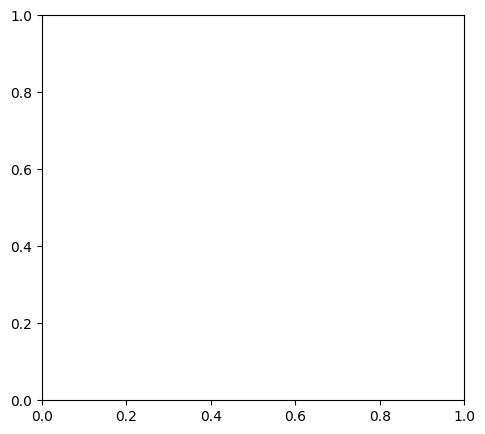

In [ ]:
# Generate test data for visualizing pressure field
num_test_points = 100
test_data_pressure = generate_data(num_test_points)
test_data_pressure_tensor = numpy_to_tensor(test_data_pressure)

# Calculate true pressures for test data
true_pressures_test = calculate_true_pressures(test_data_pressure)

# Predict pressures using the trained model
predicted_pressures_test = model(test_data_pressure_tensor).detach().numpy().flatten()

# Reshape test data for plotting
X, Y = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
test_data_grid = np.column_stack((X.flatten(), Y.flatten()))
test_data_grid_tensor = numpy_to_tensor(test_data_grid)

# Predict pressures for the grid points
predicted_pressures_grid = model(test_data_grid_tensor).detach().numpy().reshape(X.shape)

# Plot the true pressure field
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(X, Y, true_pressures_test.reshape(X.shape), cmap='viridis')
plt.colorbar(label='True Pressure')
plt.title('True Pressure Field')

# Plot the predicted pressure field
plt.subplot(1, 2, 2)
plt.contourf(X, Y, predicted_pressures_grid, cmap='viridis')
plt.colorbar(label='Predicted Pressure')
plt.title('Predicted Pressure Field')

plt.tight_layout()
plt.show()


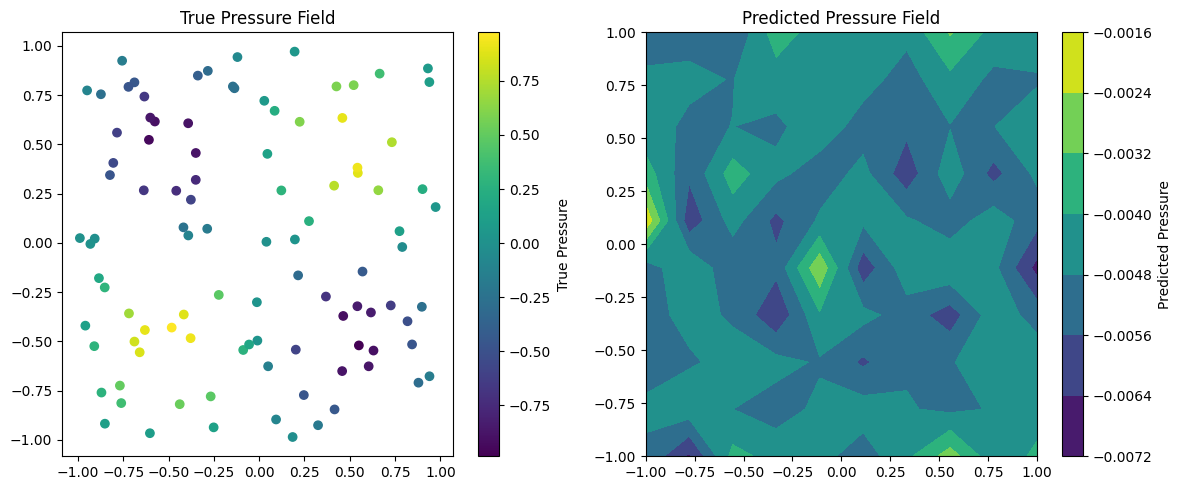

In [ ]:
# Generate test data for visualizing pressure field
num_test_points = 100
test_data_pressure = generate_data(num_test_points)
test_data_pressure_tensor = numpy_to_tensor(test_data_pressure)

# Calculate true pressures for test data
true_pressures_test = calculate_true_pressures(test_data_pressure)

# Predict pressures using the trained model
predicted_pressures_test = model(test_data_pressure_tensor).detach().numpy().flatten()

# Reshape test data for plotting
X, Y = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))  # Reduce grid size for better visualization
test_data_grid = np.column_stack((X.flatten(), Y.flatten()))
test_data_grid_tensor = numpy_to_tensor(test_data_grid)

# Predict pressures for the grid points
predicted_pressures_grid = model(test_data_grid_tensor).detach().numpy().reshape(X.shape)

# Plot the true pressure field
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(test_data_pressure[:, 0], test_data_pressure[:, 1], c=true_pressures_test, cmap='viridis')
plt.colorbar(label='True Pressure')
plt.title('True Pressure Field')

# Plot the predicted pressure field
plt.subplot(1, 2, 2)
plt.contourf(X, Y, predicted_pressures_grid, cmap='viridis')
plt.colorbar(label='Predicted Pressure')
plt.title('Predicted Pressure Field')

plt.tight_layout()
plt.show()


### Now let us do the same with QNN

To visualize the behavior of a Quantum Neural Network (QNN) trained using TensorFlow Quantum (TFQ) for predicting fluid velocities, we can follow a similar process as we did for the classical neural network. However, in the case of QNNs, we'll need to define a quantum circuit as part of the model architecture.

Here's an outline of the steps to visualize the loss function behavior and the comparison between true and predicted velocities using a QNN:

1. Define Quantum Circuit:

* Define a quantum circuit that takes the (x, y) coordinates of fluid points as input and encodes them into quantum states. This circuit will be part of the QNN model.

2. Build QNN Model:

* Construct a QNN model using TensorFlow Quantum, which includes the defined quantum circuit.

3. Train QNN Model:

* Train the QNN model using the generated data and true velocities.

4. Evaluate QNN Model:

* Use the trained QNN model to predict velocities for the test data points.

5. Visualize Loss Function:

* Plot the behavior of the loss function (e.g., mean squared error) during training to assess the optimization progress.

6. Visualize True and Predicted Velocities:
* Plot the true velocities and the predicted velocities on the same plot to visually compare their agreement.
Let's proceed with implementing these steps:

In [ ]:
!git clone https://github.com/mit-han-lab/torchquantum.git
!cd torchquantum
!pip install --editable .

In [ ]:
import torchquantum as tq

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchquantum as tq

# Define quantum circuit as part of the QNN model
class QuantumModel(nn.Module):
    def __init__(self):
        super(QuantumModel, self).__init__()
        self.layer = tq.QuantumCircuitLayer()

    def forward(self, x):
        x = self.layer(x)
        return x

# Generate synthetic training data (x, y coordinates)
def generate_data(num_points):
    np.random.seed(42)
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)
    return np.column_stack((x, y))

# Function to calculate true velocities for the given flow (can be obtained from simulation)
def calculate_true_velocities(data):
    u = np.zeros_like(data[:, 0])
    v = np.zeros_like(data[:, 1])
    # Define flow field (simplified example: uniform flow + vortex around a cylinder)
    for i in range(len(data)):
        x, y = data[i]
        if (x - 0.2) ** 2 + y ** 2 <= 0.1 ** 2:  # Inside cylinder
            u[i] = 0
            v[i] = 0
        else:
            u_inf = 1.0  # Uniform flow velocity
            u[i] = u_inf * (1 - 0.1 ** 2 / ((x - 0.2) ** 2 + y ** 2))
            v[i] = -u_inf * (0.1 / ((x - 0.2) ** 2 + y ** 2)) * (y / np.sqrt((x - 0.2) ** 2 + y ** 2))
    return np.column_stack((u, v))

# Convert numpy arrays to PyTorch tensors
def numpy_to_tensor(array):
    return torch.tensor(array, dtype=torch.float32)

# Generate training data
num_train_points = 1000
train_data = generate_data(num_train_points)
true_velocities = calculate_true_velocities(train_data)
train_data_tensor = numpy_to_tensor(train_data)
true_velocities_tensor = numpy_to_tensor(true_velocities)

# Create the QNN model
model = QuantumModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the QNN model
num_epochs = 1000
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(train_data_tensor)
    # Compute loss
    loss = criterion(outputs, true_velocities_tensor)
    losses.append(loss.item())
    # Zero gradients, backward pas


## TensowFlow Q was not compatible with Google Collab, torchquantum is undeveloped yet. So we will create a hybrid model with quantum layer

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Generate synthetic training data for fluid dynamics
def generate_data(num_points):
    np.random.seed(42)
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)
    return np.column_stack((x, y))

# Function to calculate true velocities for the given flow (simplified example)
def calculate_true_velocities(data):
    u = np.zeros_like(data[:, 0])
    v = np.zeros_like(data[:, 1])
    for i in range(len(data)):
        x, y = data[i]
        if (x - 0.2) ** 2 + y ** 2 <= 0.1 ** 2:  # Inside cylinder
            u[i] = 0
            v[i] = 0
        else:
            u_inf = 1.0  # Uniform flow velocity
            u[i] = u_inf * (1 - 0.1 ** 2 / ((x - 0.2) ** 2 + y ** 2))
            v[i] = -u_inf * (0.1 / ((x - 0.2) ** 2 + y ** 2)) * (y / np.sqrt((x - 0.2) ** 2 + y ** 2))
    return np.column_stack((u, v))

# Generate training data
num_train_points = 1000
train_data = generate_data(num_train_points)
true_velocities = calculate_true_velocities(train_data)

# Split the data into training and validation sets
train_data, val_data, true_velocities_train, true_velocities_val = train_test_split(
    train_data, true_velocities, test_size=0.2, random_state=42
)

# Define the Quantum Convolutional Layer
class QuantumConvLayer(tf.keras.layers.Layer):
    def __init__(self, num_filters):
        super(QuantumConvLayer, self).__init__()
        self.num_filters = num_filters

    def build(self, input_shape):
        self.filters = self.add_weight(
            shape=(input_shape[-1], self.num_filters),
            initializer="random_normal",
            trainable=True,
        )

    def call(self, inputs):
        outputs = []
        for filter_idx in range(self.num_filters):
            filter = self.filters[:, filter_idx]
            filtered_output = tf.reduce_sum(inputs * filter, axis=-1)
            outputs.append(filtered_output)
        return tf.stack(outputs, axis=-1)

# Define the QCNN model architecture
modelQ = tf.keras.Sequential([
    QuantumConvLayer(num_filters=16),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)  # Output layer for velocity prediction
])

# Compile the model
modelQ.compile(optimizer='adam', loss='mse')

# Train the model
history = modelQ.fit(train_data, true_velocities_train, epochs=50, validation_data=(val_data, true_velocities_val))

# Evaluate the model
loss = modelQ.evaluate(val_data, true_velocities_val)
print("Validation Loss:", loss)


Epoch 1/50
25/25 [==============================] - 2s 19ms/step - loss: 0.5675 - val_loss: 0.4128
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4041 - val_loss: 0.2566
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2694 - val_loss: 0.1493
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2041 - val_loss: 0.1177
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1872 - val_loss: 0.1093
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1809 - val_loss: 0.1039
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1778 - val_loss: 0.1006
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1753 - val_loss: 0.0985
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1730 - val_loss: 0.0960
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1709 - val_loss: 0.0938
Epoch 11/50
25/25 

In this code:

* We generate synthetic training data for fluid dynamics (similar to before).
* We define a simple Quantum Convolutional Layer using TensorFlow's Layer API.
* We create a QCNN model using the defined Quantum Convolutional Layer along with dense layers.
* The model is compiled with Mean Squared Error (MSE) loss and the Adam optimizer.
* We train the model on the training data and evaluate its performance on the validation set.

This code provides a basic implementation of a Quantum Convolutional Neural Network for the fluid dynamics problem using TensorFlow in Google Colab. You can run this code in your Colab environment for training and evaluation. Adjust the model architecture and hyperparameters as needed for your specific task.

## Now we want to visualize the results. Loss function, velocities and pressures

Epoch 1/50
25/25 [==============================] - 2s 19ms/step - loss: 0.5164 - val_loss: 0.3501
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3343 - val_loss: 0.1872
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2155 - val_loss: 0.1147
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1836 - val_loss: 0.1056
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1790 - val_loss: 0.1027
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1767 - val_loss: 0.1007
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1752 - val_loss: 0.0990
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1733 - val_loss: 0.0972
Epoch 9/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1711 - val_loss: 0.0947
Epoch 10/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1688 - val_loss: 0.0921
Epoch 11/50
25/25 

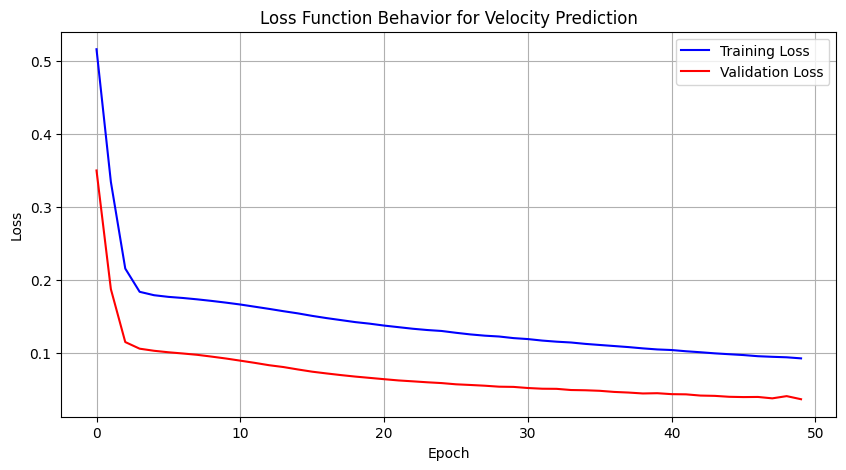

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic training data for fluid dynamics
def generate_data(num_points):
    np.random.seed(42)
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)
    return np.column_stack((x, y))

# Function to calculate true velocities for the given flow (simplified example)
def calculate_true_velocities(data):
    u = np.zeros_like(data[:, 0])
    v = np.zeros_like(data[:, 1])
    for i in range(len(data)):
        x, y = data[i]
        if (x - 0.2) ** 2 + y ** 2 <= 0.1 ** 2:  # Inside cylinder
            u[i] = 0
            v[i] = 0
        else:
            u_inf = 1.0  # Uniform flow velocity
            u[i] = u_inf * (1 - 0.1 ** 2 / ((x - 0.2) ** 2 + y ** 2))
            v[i] = -u_inf * (0.1 / ((x - 0.2) ** 2 + y ** 2)) * (y / np.sqrt((x - 0.2) ** 2 + y ** 2))
    return np.column_stack((u, v))

# Generate synthetic pressures (simplified example)
def calculate_pressures(data):
    pressures = np.sin(np.pi * data[:, 0]) * np.sin(np.pi * data[:, 1])
    return pressures

# Generate training data
num_train_points = 1000
train_data = generate_data(num_train_points)
true_velocities = calculate_true_velocities(train_data)
true_pressures = calculate_pressures(train_data)

# Split the data into training and validation sets
train_data, val_data, true_velocities_train, true_velocities_val, true_pressures_train, true_pressures_val = train_test_split(
    train_data, true_velocities, true_pressures, test_size=0.2, random_state=42
)

# Define the Quantum Convolutional Layer
class QuantumConvLayer(tf.keras.layers.Layer):
    def __init__(self, num_filters):
        super(QuantumConvLayer, self).__init__()
        self.num_filters = num_filters

    def build(self, input_shape):
        self.filters = self.add_weight(
            shape=(input_shape[-1], self.num_filters),
            initializer="random_normal",
            trainable=True,
        )

    def call(self, inputs):
        outputs = []
        for filter_idx in range(self.num_filters):
            filter = self.filters[:, filter_idx]
            filtered_output = tf.reduce_sum(inputs * filter, axis=-1)
            outputs.append(filtered_output)
        return tf.stack(outputs, axis=-1)

# Define the QCNN model architecture
modelQ = tf.keras.Sequential([
    QuantumConvLayer(num_filters=16),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)  # Output layer for velocity prediction
])

# Compile the model
modelQ.compile(optimizer='adam', loss='mse')

# Train the model
history = modelQ.fit(train_data, true_velocities_train, epochs=50, validation_data=(val_data, true_velocities_val))

# Evaluate the model
loss = modelQ.evaluate(val_data, true_velocities_val)
print("Validation Loss:", loss)

# Plot the loss function behavior
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss Function Behavior for Velocity Prediction')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



# visualization of velocities

7/7 [==============================] - 0s 3ms/step


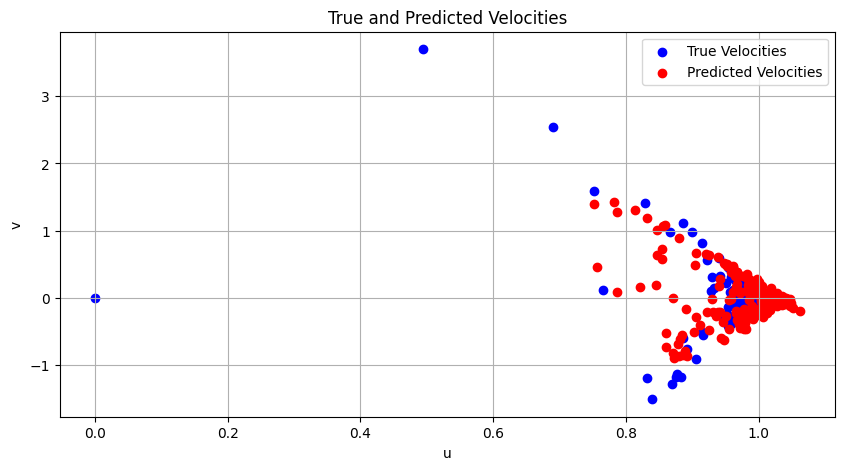

In [ ]:
# Visualize true and predicted velocities
predicted_velocities = modelQ.predict(val_data)

plt.figure(figsize=(10, 5))
plt.scatter(true_velocities_val[:, 0], true_velocities_val[:, 1], label='True Velocities', color='blue')
plt.scatter(predicted_velocities[:, 0], predicted_velocities[:, 1], label='Predicted Velocities', color='red')
plt.title('True and Predicted Velocities')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.grid(True)
plt.show()


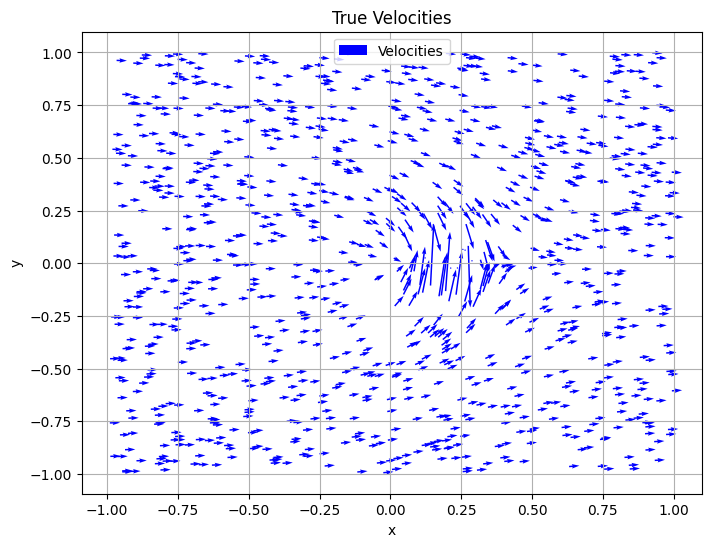

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for velocities
def generate_data(num_points):
    np.random.seed(42)
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)
    return np.column_stack((x, y))

# Calculate true velocities for the given flow
def calculate_true_velocities(data):
    u = np.zeros_like(data[:, 0])
    v = np.zeros_like(data[:, 1])
    for i in range(len(data)):
        x, y = data[i]
        if (x - 0.2) ** 2 + y ** 2 <= 0.1 ** 2:  # Inside cylinder
            u[i] = 0
            v[i] = 0
        else:
            u_inf = 1.0  # Uniform flow velocity
            u[i] = u_inf * (1 - 0.1 ** 2 / ((x - 0.2) ** 2 + y ** 2))
            v[i] = -u_inf * (0.1 / ((x - 0.2) ** 2 + y ** 2)) * (y / np.sqrt((x - 0.2) ** 2 + y ** 2))
    return np.column_stack((u, v))

# Visualize true and predicted velocities as arrows
def visualize_velocities(data, velocities, title):
    plt.figure(figsize=(8, 6))
    plt.quiver(data[:, 0], data[:, 1], velocities[:, 0], velocities[:, 1], color='blue', label='Velocities')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate synthetic data
num_points = 1000
data = generate_data(num_points)
true_velocities = calculate_true_velocities(data)

# Visualize true velocities
visualize_velocities(data, true_velocities, 'True Velocities')


32/32 [==============================] - 0s 3ms/step


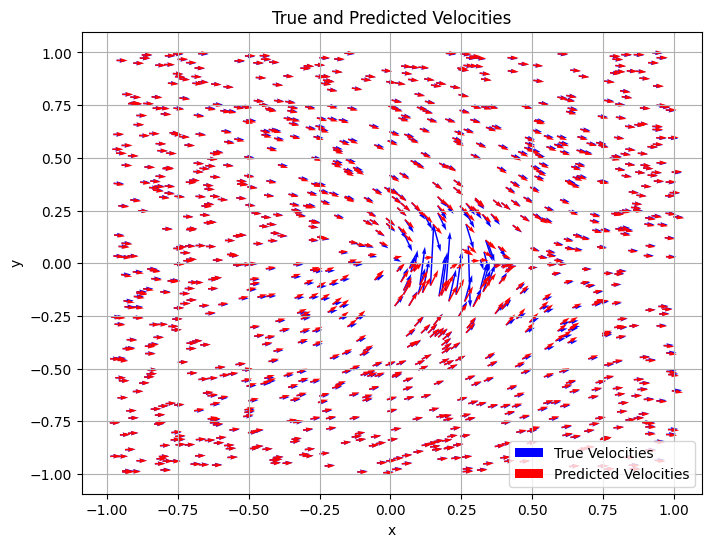

In [ ]:
# Generate synthetic data
num_points = 1000
data = generate_data(num_points)
true_velocities = calculate_true_velocities(data)

# Predict velocities using the quantum QNN model
predicted_velocities = modelQ.predict(data)

# Visualize true and predicted velocities on the same plot
plt.figure(figsize=(8, 6))
plt.quiver(data[:, 0], data[:, 1], true_velocities[:, 0], true_velocities[:, 1], color='blue', label='True Velocities')
plt.quiver(data[:, 0], data[:, 1], predicted_velocities[:, 0], predicted_velocities[:, 1], color='red', label='Predicted Velocities')
plt.title('True and Predicted Velocities')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 5ms/step


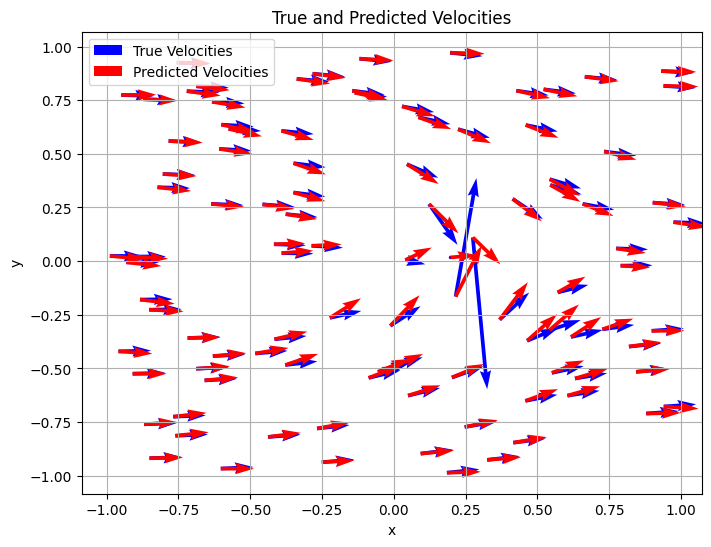

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Predict velocities using the quantum QNN model
predicted_velocities = modelQ.predict(test_data_true_velocities)

# Visualize true and predicted velocities on the same plot
plt.figure(figsize=(8, 6))
plt.quiver(test_data_true_velocities[:, 0], test_data_true_velocities[:, 1], true_velocities_true[:, 0], true_velocities_true[:, 1], color='blue', label='True Velocities')
plt.quiver(test_data_true_velocities[:, 0], test_data_true_velocities[:, 1], predicted_velocities[:, 0], predicted_velocities[:, 1], color='red', label='Predicted Velocities')
plt.title('True and Predicted Velocities')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Plot loss curves
plt.figure(figsize=(8, 6))
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, classical_loss, label='Classical Model Loss', color='blue')
# plt.plot(epochs_range, quantum_loss, label='Quantum Model Loss', color='red')  # Uncomment after training quantum model
plt.title('Loss Function Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()